# Data Science Capstone Project 

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv('Data-Collisions.csv')

C:\Users\risha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(2)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N


In [4]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
df_clear = df.drop(columns=['SDOT_COLDESC','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY', 'SDOTCOLNUM', 'SEVERITYCODE.1', 'SEVERITYDESC','LOCATION', 'STATUS', 'INCKEY', 'COLDETKEY', 'X', 'Y', 'INTKEY','EXCEPTRSNCODE', 'OBJECTID', 'REPORTNO','EXCEPTRSNDESC' ,'SPEEDING', 'PEDROWNOTGRNT', 'INATTENTIONIND', 'SDOT_COLCODE', 'ST_COLCODE'])

### Severity categories' inbalance in the data

#### Value count of difference code of severity of accidents

In [7]:
df_clear['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Deleting the random rows of data where severity code is '1' to have balance in the different categories of severity.

In [8]:
df_clear.drop(df_clear.query('SEVERITYCODE == 1').sample(frac=.57).index, inplace=True)

value counts of different categories of code of severity 

In [9]:
df_clear['SEVERITYCODE'].value_counts()

1    58689
2    58188
Name: SEVERITYCODE, dtype: int64

### Data extraction - Bring out the day of week and time from accident datatime

In [10]:
df_clear['INCDATE'] = df_clear['INCDATE'].str.split(" ", expand=True)[0]

In [11]:
df_clear['INCDATE'] = pd.to_datetime(df_clear['INCDATE'])

In [12]:
df_clear['DAYOFWEEK'] = df_clear['INCDATE'].dt.dayofweek

In [13]:
df_clear['INCDTTM'] = pd.to_datetime(df_clear['INCDTTM'])

In [14]:
df_clear['TIMEINHOURS'] = df_clear['INCDTTM'].dt.hour

In [15]:
df_clear.drop(columns=['INCDATE', 'INCDTTM'], inplace = True) 

#### Replacing 'N' and 'Y' with '0' and '1' 

In [16]:
df_clear.replace({'HITPARKEDCAR': {'N': '0', 'Y': '1'}}, inplace=True)

In [17]:
df_clear.replace({'UNDERINFL': {'N': '0', 'Y': '1'}}, inplace=True)

In [18]:
df_clear['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              49900
At Intersection (intersection related)               42231
Mid-Block (but intersection related)                 13968
Driveway Junction                                     6434
At Intersection (but not related to intersection)     1247
Ramp Junction                                          114
Unknown                                                  6
Name: JUNCTIONTYPE, dtype: int64

In [19]:
df_clear.replace({'JUNCTIONTYPE': {'Mid-Block (not related to intersection)': 'Mid-Block_not_related_to_intersection', 
                                   'At Intersection (intersection related)': 'At_Intersection',
                                   'Mid-Block (but intersection related)': 'Mid-Block_but_intersection_related)',
                                   'Driveway Junction': 'Driveway_Junction',
                                   'At Intersection (but not related to intersection)': 'At_Intersection_but_not_related_to_intersection)',
                                   'Ramp Junction': 'Ramp_Junction',
                                   'Unknown' : 'JunctionTypeUnknown'
                                  }}, inplace=True)

In [20]:
df_clear['COLLISIONTYPE'].value_counts()

Rear Ended    23018
Angles        22520
Parked Car    22286
Other         13785
Sideswipe      9427
Left Turn      8903
Pedestrian     6187
Cycles         5022
Right Turn     1614
Head On        1386
Name: COLLISIONTYPE, dtype: int64

In [21]:
df_clear.replace({'COLLISIONTYPE': {'Rear Ended':'Rear_Ended',
                                    'Parked Car':'Parked_Car',
                                    'Other':'CollisionType_other',
                                    'Left Turn':'Left_Turn',
                                    'Right Turn':'Right_Turn',
                                    'Head On':'Head_On'
                                    
                                  }}, inplace=True)

In [22]:

df_clear['LIGHTCOND'].value_counts()

Daylight                    71774
Dark - Street Lights On     29227
Unknown                      6094
Dusk                         3737
Dawn                         1525
Dark - No Street Lights       837
Dark - Street Lights Off      679
Other                         134
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

In [23]:
df_clear.replace({'LIGHTCOND': {'Dark - Street Lights On':'Dark-Street_Lights_On',
                              'Other':'LIGHT_Other',
                              'Unknown':'LIGHT_Unknown',
                              'Dark - No Street Lights':'Dark-No_Street_Lights',
                              'Dark - Street Lights Off':'Dark-Street_Lights_Off',
                                'Dark - Unknown Lighting':'Dark-Unknown_Lighting'
                                  }}, inplace=True)

In [24]:
df_clear.replace({'WEATHER': {'Unknown':'WEATHER_Unknown',
                              'Other':'WEATHER_Other',
                              'Severe Crosswind':'Severe_Crosswind',
                              'Partly Cloudy':'Partly_Cloudy',
                              'Blowing Sand/Dirt':'Blowing_Sand/Dirt'
                                  }}, inplace=True)

In [25]:
df_clear.replace({'ROADCOND': {'Unknown':'ROADCOND_Unknown',
                              'Other':'ROADCOND_Other',
                              'Standing Water':'Standing_Water'
                                  }}, inplace=True)

In [26]:
df_clear.shape

(116877, 15)

In [27]:
df_clear.dropna(inplace =True)

### Visual analyse of the accident data

##### 1. Lighting condition: 
From the plot, it is clear that lighting condition don't have much influnce in determing the type of severity of the accident. 

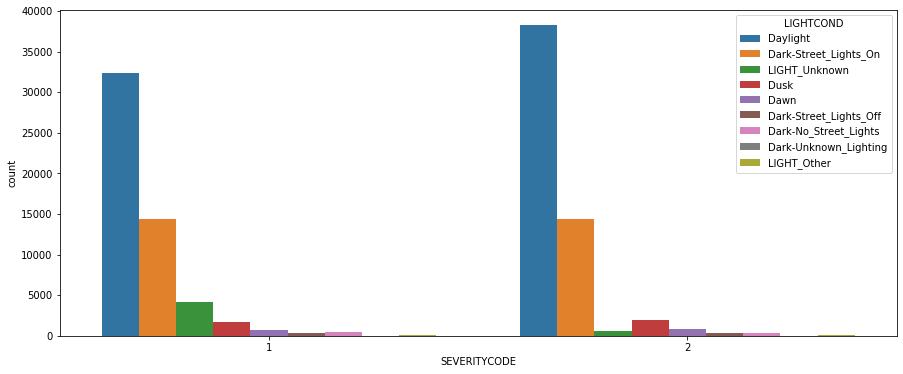

In [28]:
plt.figure(figsize=(15,6))
sns.countplot( hue='LIGHTCOND', x ='SEVERITYCODE', data=df_clear)

##### 2. Road condition: 
From the plot, it is clear that road condition don't have much influnce in determing the type of severity of the accident. The wet road conditions almost have similar number of accidents for both the severity. Further, Dry road conditions contribute to more number of accident as against the wet road conditions. It may be due the fact that dry condition is more prevalent than wet road condition. Since we don't have time proportion of dry to wet condition, we can't make a prediction that wet condition have more probability than dry condition.

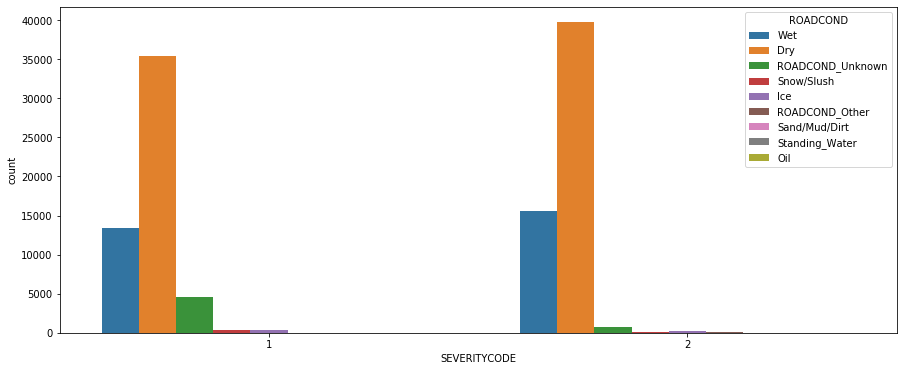

In [29]:
plt.figure(figsize=(15,6))
sns.countplot( hue='ROADCOND', x ='SEVERITYCODE', data=df_clear)

##### 3. Weather condition: 
From the plot, it is clear that weather condition don't have much influnce in determing the type of severity of the accident. Clear weather have marginally more number of Severity-2 accidents. Further, raining don't seems to have influence on determining the severity of accidents.

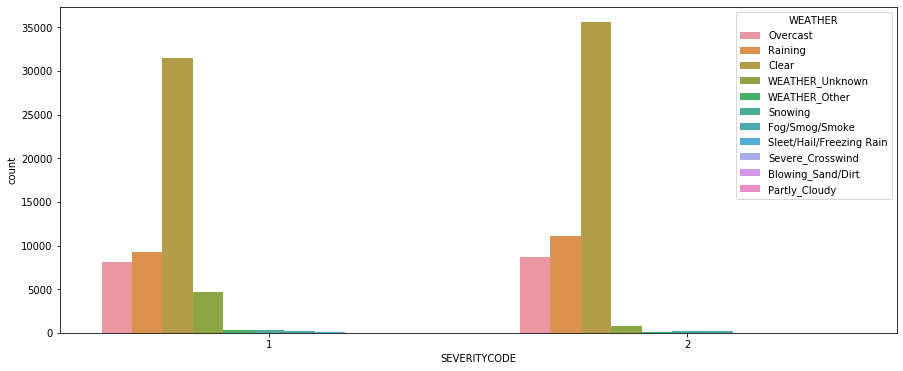

In [30]:
plt.figure(figsize=(15,6))
sns.countplot( hue='WEATHER', x ='SEVERITYCODE', data=df_clear)

##### 4. Junction Type: 
From the plot, it is clear that junction type have influence on determining the severity of accidents. At intersection junction, there are more severity-2 accident than severity-1 accidents. Similirly, in mid-block junction, there are more severity-1 accident than severity-2 accidents.

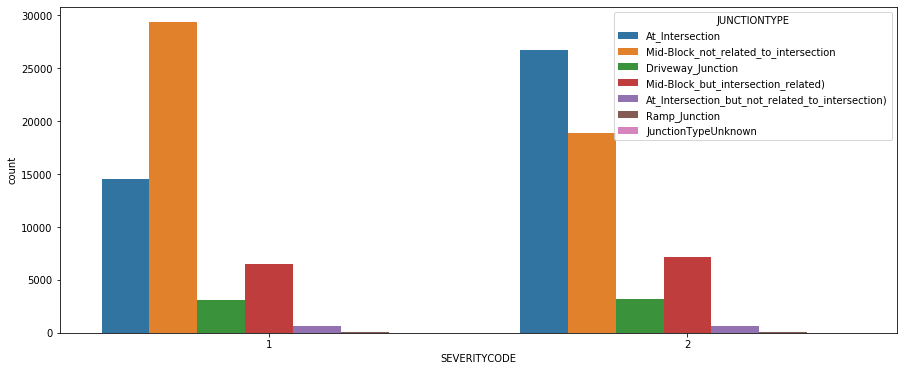

In [31]:
plt.figure(figsize=(15,6))
sns.countplot( hue='JUNCTIONTYPE', x ='SEVERITYCODE', data=df_clear)

##### 5. Collision Type: 
From the plot, it is clear that collision type have some relationship with type of severity of accident. As most of parked car collision have severity-1 accidents.

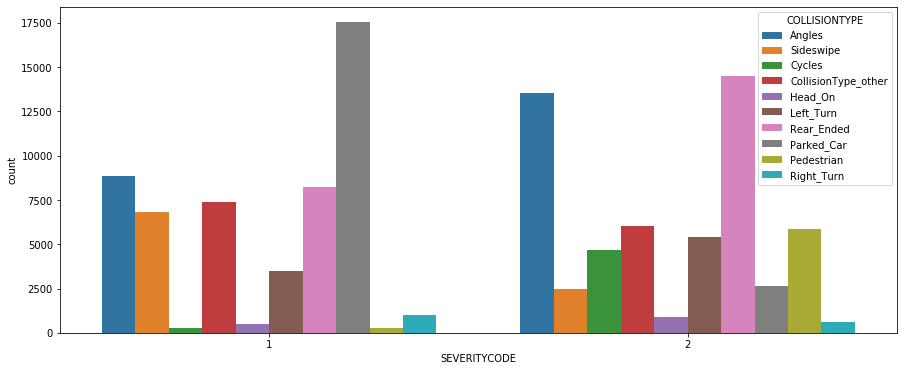

In [32]:
plt.figure(figsize=(15,6))
sns.countplot( hue='COLLISIONTYPE', x ='SEVERITYCODE', data=df_clear)

##### 6. Address Type: 
From the plot, it is clear that Block have more of severity-1 type accidents.

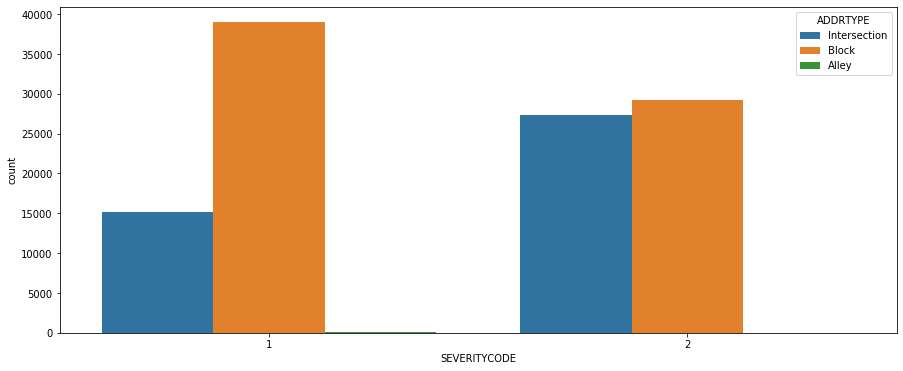

In [33]:
plt.figure(figsize=(15,6))
sns.countplot( hue='ADDRTYPE', x ='SEVERITYCODE', data=df_clear)

##### 7. Day of week:
From the plot, it seems that day of the week don't have any relationship with severity of accident. However, it is clear from the plot that the number of accident is highest on fridays and lowest on sundays.

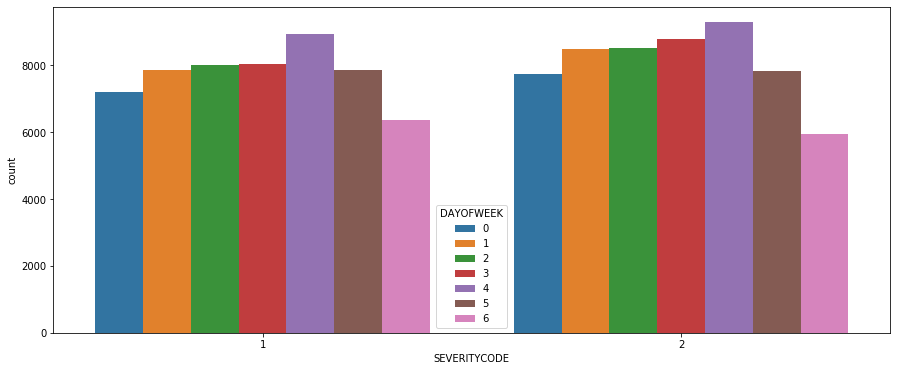

In [34]:
plt.figure(figsize=(15,6))
sns.countplot( hue='DAYOFWEEK', x ='SEVERITYCODE', data=df_clear)

##### 8. Hours of accidents
There are highest number of accident between 5PM and 6PM.

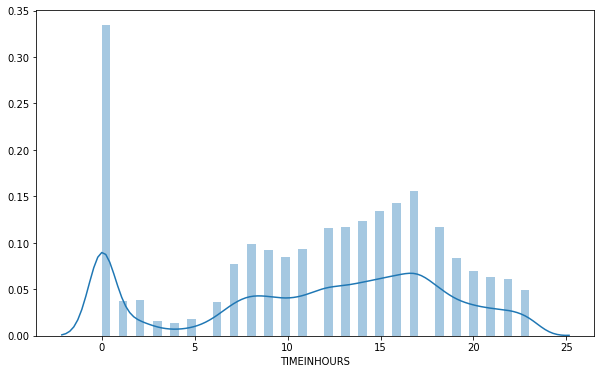

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(df_clear['TIMEINHOURS'])

##### 9. Under the influence of drug or alcohol
There seems to be no relationship between influence of drug or alcohol and the severity of the accidents.

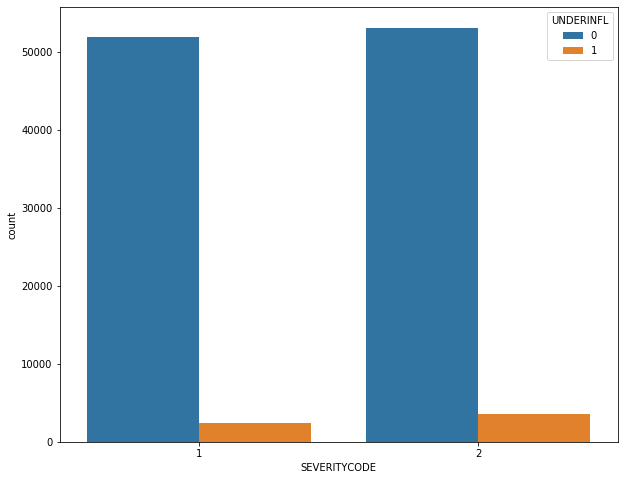

In [36]:
plt.figure(figsize=(10,8))
sns.countplot( hue='UNDERINFL', x ='SEVERITYCODE', data=df_clear)

### Dealing with categorical features- creating dummy variables 

In [37]:
addressType = pd.get_dummies(df_clear['ADDRTYPE'], drop_first=True)
df_clear.drop(['ADDRTYPE'], axis=1, inplace =True)
df_clear = pd.concat([df_clear, addressType], axis=1)

In [38]:
Collision = pd.get_dummies(df_clear['COLLISIONTYPE'], drop_first=True)
df_clear.drop(['COLLISIONTYPE'], axis=1, inplace =True)

JUNCTION = pd.get_dummies(df_clear['JUNCTIONTYPE'], drop_first=True)
df_clear.drop(['JUNCTIONTYPE'], axis=1, inplace =True)

WEATHER = pd.get_dummies(df_clear['WEATHER'], drop_first=True)
df_clear.drop(['WEATHER'], axis=1, inplace =True)

ROAD = pd.get_dummies(df_clear['ROADCOND'], drop_first=True)
df_clear.drop(['ROADCOND'], axis=1, inplace =True)

LIGHT = pd.get_dummies(df_clear['LIGHTCOND'], drop_first=True)
df_clear.drop(['LIGHTCOND'], axis=1, inplace =True)

df_clear = pd.concat([df_clear, Collision, JUNCTION, WEATHER, ROAD, LIGHT], axis=1)

In [39]:
X = df_clear.drop('SEVERITYCODE', axis=1)
X[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,DAYOFWEEK,TIMEINHOURS,Block,Intersection,...,Standing_Water,Wet,Dark-Street_Lights_Off,Dark-Street_Lights_On,Dark-Unknown_Lighting,Dawn,Daylight,Dusk,LIGHT_Other,LIGHT_Unknown
0,2,0,0,2,0,0,2,14,0,1,...,0,1,0,0,0,0,1,0,0,0
1,2,0,0,2,0,0,2,18,1,0,...,0,1,0,1,0,0,0,0,0,0
4,2,0,0,2,0,0,2,8,0,1,...,0,1,0,0,0,0,1,0,0,0
6,2,0,0,2,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
7,3,0,1,1,0,0,2,17,0,1,...,0,0,0,0,0,0,1,0,0,0


In [40]:
y = df_clear['SEVERITYCODE']
y[0:5]

0    2
1    1
4    2
6    1
7    2
Name: SEVERITYCODE, dtype: int64

Preprocessing feature data by standardscaler function

In [41]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [42]:
df_clear

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,HITPARKEDCAR,DAYOFWEEK,TIMEINHOURS,Block,...,Standing_Water,Wet,Dark-Street_Lights_Off,Dark-Street_Lights_On,Dark-Unknown_Lighting,Dawn,Daylight,Dusk,LIGHT_Other,LIGHT_Unknown
0,2,2,0,0,2,0,0,2,14,0,...,0,1,0,0,0,0,1,0,0,0
1,1,2,0,0,2,0,0,2,18,1,...,0,1,0,1,0,0,0,0,0,0
4,2,2,0,0,2,0,0,2,8,0,...,0,1,0,0,0,0,1,0,0,0
6,1,2,0,0,2,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
7,2,3,0,1,1,0,0,2,17,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194666,2,2,0,0,2,0,0,4,13,1,...,0,1,0,0,0,0,1,0,0,0
194667,1,1,0,0,1,1,0,2,21,1,...,0,1,0,1,0,0,0,0,0,0
194668,2,3,0,0,2,0,0,0,8,1,...,0,0,0,0,0,0,1,0,0,0
194670,2,3,0,0,2,0,0,5,9,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (77630, 51) (77630,)
Test set: (33271, 51) (33271,)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [45]:
y_pred = knn.predict(X_test)

In [46]:
y_pred

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

In [47]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Train set Accuracy:  0.7490660826999871
Test set Accuracy:  0.6530311682846923


In [48]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.63508761, 0.6265216 , 0.66162724, 0.65303117, 0.67316883,
       0.66472303, 0.67758709, 0.67166602, 0.68260647])

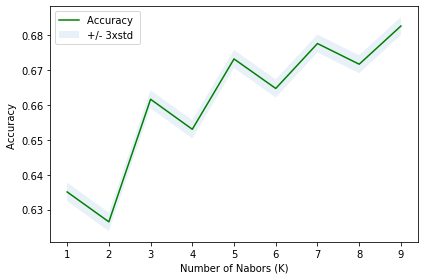

In [49]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [51]:
y_predLR = LR.predict(X_test)

In [52]:
y_predLR

array([2, 2, 1, ..., 2, 2, 1], dtype=int64)

In [53]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predLR))

Train set Accuracy:  0.703581089784877
Test set Accuracy:  0.7046376724474768


In [54]:
from sklearn import svm
SVM = svm.SVC(kernel='rbf')
SVM.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
y_predSVM = SVM.predict(X_test)

In [56]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, SVM.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predSVM))

Train set Accuracy:  0.7120185495298209
Test set Accuracy:  0.7078837425986595
